# Librerías

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

# Conexión al repositorio de datos

In [2]:
#Accedemos a Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [3]:
#Leemos los datos
#Se trata de un dataset que describe las características de billetes verdaderos y falsos
df = pd.read_csv('/content/drive/MyDrive/Data/billetes.csv')
df

#No entraremos mucho en los detalles de qué significa cada variable
#Cada variable indica una característica del billete
#El label "class" determina si un billete es o no falso

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Definición de "features"

In [4]:
#Definimos los features
x = df[['variace', 'skewness', 'curtosis', 'entropy']].values
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [5]:
#En el caso de los features, vamos a escalarlos con valores entre 0 y 1

In [6]:
#Importamos la librería para escalar
from sklearn.preprocessing import scale

In [7]:
#Escalamos
x = scale(x)
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

# Definición de "labels"

In [8]:
#Definimos los labels
y = df['class'].values
y

array([0, 0, 0, ..., 1, 1, 1])

# División de los datos en datos de entrenamiento (x_train, y_train) y datos de validación (x_test, y_test)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Calibrando el optimizador

In [10]:
#Importamos las librerías de Keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#Importamos los optimizadores
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [ ]:
#Vamos a probar diferentes optimizadores para ver cuál se adecua mejor a la realidad

In [11]:
#Probaremos diferentes valores para el optimizador
array_optimizadores = [
'SGD(learning_rate=0.5)',
'SGD(learning_rate=0.5, momentum=0.3)',
'SGD(learning_rate=0.5, momentum=0.3, nesterov=True)',  
'Adam(learning_rate=0.5)',
'Adagrad(learning_rate=0.5)',
'RMSprop(learning_rate=0.5)'
]

In [12]:
#Creamos un array en donde guardaremos las descripciones de cada entrenamiento
array_descripciones = []

In [13]:
#Iteramos cada calibración
for optimizador in array_optimizadores:
  model = Sequential()
  model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
  
  #Agregamos el "lr" de la calibración
  #En "lr" ya hemos calibrado su valor, sabemos que el valor de 0.5 es el indicado
  model.compile(
    loss='binary_crossentropy',
    optimizer=eval(optimizador),
    metrics=['accuracy']
  )
  
  #Entrenamos la neurona
  #En "batch_size" colocamos 32, ya que fue lo que encontramos en la calibración anterior
  descripcion_de_entrenamiento = model.fit(x_train, y_train, epochs = 10, batch_size=32, verbose=0)

  #Convertimos la descripción del entrenamiento en un dataframe
  df = pd.DataFrame(
      descripcion_de_entrenamiento.history,
      index = descripcion_de_entrenamiento.epoch
  )

  #Agregamos el dataframe a la lista de descripciones de entrenamiento
  array_descripciones.append(df)

In [14]:
#Vemos los dataframes
array_descripciones[0]

,loss,accuracy
0,0.509082,0.762500
1,0.206222,0.944792
2,0.148414,0.959375
3,0.119925,0.969792
4,0.103265,0.971875
5,0.092630,0.973958
6,0.084524,0.975000
7,0.078793,0.978125
8,0.074254,0.977083
9,0.070280,0.979167


In [15]:
#Vemos los dataframes
array_descripciones[1]

,loss,accuracy
0,0.364040,0.859375
1,0.157941,0.962500
2,0.115888,0.969792
3,0.096052,0.975000
4,0.084131,0.975000
5,0.076232,0.978125
6,0.070516,0.980208
7,0.066176,0.980208
8,0.062686,0.980208
9,0.059873,0.980208


In [17]:
#Vamos a crear una función utilitaria para obtener el dataframe con los "accuracy" y "loss"
def obtener_df_loss_accuracy(array_calibracion, descripcion_calibracion, array_descripciones):
  #Fusionaremos uno tras otro para crear un único registro
  #Recordemos que al usar "axis = 1" estamos fusionandolas filas
  dfDescripcion = pd.concat(array_descripciones, axis = 1)

  #A cada "loss" y "accuracy" vamos a agregarle por encima su lr
  #Obtenemos el primer elemento del array de dataframes para obtener los títulos de las columnas
  columnas_loss_accuracy = array_descripciones[0].columns

  #Vamos a crear nuevas columnas a nuestro dataframe
  #Primero colocaremos las columnas que tendrán el nombre de cada lr usado, estos valores están en "array_lr"
  #Luego, para cada "descripcion_calibracion" vamos a colocarle las columnas "columnas_loss_accuracy"
  #Estas son columnas anidadas, las podemos crear con la función "MultiIndex" de Pandas
  #Por último, con el parámetro "names" colocamos el nombre para cada agrupación de columnas
  nuevas_columnas = pd.MultiIndex.from_product(
    [array_calibracion, columnas_loss_accuracy],
    names=[descripcion_calibracion, 'metricas']
  )

  #Colocamos las nuevas columnas a nuestro dataframe
  dfDescripcion.columns = nuevas_columnas
  dfDescripcion

  #Vamos a crear el dataframe de "loss"
  #Usaremos la función "xs" que nos permite navegar en un dataframe con índices complejos y extraer los campos que queremos
  #En la función "xs" definimos:
  # 1. El campo que queremos consultar (loss)
  # 2. De qué subconjunto de campos queremos consultar (level = 'metricas')
  # 3. Cómo queremos extraer la data (axis = 1, queremos extraerla como columnas)
  dfLoss = dfDescripcion.xs('loss', level = 'metricas', axis = 1)
  
  #Vamos a crear el dataframe de "accuracy"
  #Usaremos la función "xs" que nos permite navegar en un dataframe con índices complejos y extraer los campos que queremos
  #En la función "xs" definimos:
  # 1. El campo que queremos consultar (accuracy)
  # 2. De qué subconjunto de campos queremos consultar (level = 'metricas')
  # 3. Cómo queremos extraer la data (axis = 1, queremos extraerla como columnas)
  dfAccuracy = dfDescripcion.xs('accuracy', level = 'metricas', axis = 1)
  dfAccuracy

  #Devolvemos los dataframes
  return dfLoss, dfAccuracy

In [18]:
#Usamos la función
dfLoss, dfAccuracy = obtener_df_loss_accuracy(array_optimizadores, 'optimizador', array_descripciones)

In [ ]:
#Obtenemos la evolución de los "loss"
dfLoss

optimizador,SGD(lr=0.5),"SGD(lr=0.5, momentum=0.3)","SGD(lr=0.5, momentum=0.3, nesterov=True)",Adam(lr=0.5),Adagrad(lr=0.5),RMSprop(lr=0.5)
0,0.353813,0.364365,0.305434,0.196987,0.258220,0.132206
1,0.176543,0.163832,0.160606,0.043277,0.126157,0.048683
2,0.134207,0.117272,0.116651,0.036870,0.097610,0.044304
3,0.112150,0.096529,0.096843,0.034300,0.083314,0.041095
4,0.098580,0.084662,0.084915,0.033463,0.074809,0.038508
5,0.088950,0.076503,0.076565,0.034259,0.068795,0.035317
6,0.082048,0.070767,0.070683,0.031700,0.064496,0.036588
7,0.076654,0.066367,0.066264,0.029009,0.061295,0.039000
8,0.072374,0.062954,0.062847,0.028927,0.058349,0.032993
9,0.068913,0.059936,0.059970,0.034276,0.056057,0.029600


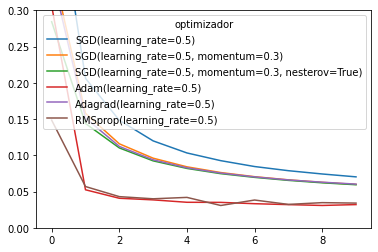

In [25]:
#Graficamos
#Vamos a graficar este dataframe
#Recordemos que mientras más pequeño sea el "loss" en cada iteración significa que el error se está minimizando
#En el eje X colocará los índices de cada iteración
#En el eje Y el valor de su "loss"
#Como son cuatro lr, creará cuatro gráficos
dfLoss.plot(ylim=(0,0.3))

In [26]:
#INTERPRETACIÓN
#El "Adam(lr=0.5)" es quien reduce el loss

In [27]:
#Obtenemos la evolución de los "accuracy"
dfAccuracy

optimizador,SGD(learning_rate=0.5),"SGD(learning_rate=0.5, momentum=0.3)","SGD(learning_rate=0.5, momentum=0.3, nesterov=True)",Adam(learning_rate=0.5),Adagrad(learning_rate=0.5),RMSprop(learning_rate=0.5)
0,0.762500,0.859375,0.904167,0.842708,0.868750,0.939583
1,0.944792,0.962500,0.965625,0.980208,0.965625,0.971875
2,0.959375,0.969792,0.970833,0.982292,0.970833,0.981250
3,0.969792,0.975000,0.976042,0.983333,0.977083,0.982292
4,0.971875,0.975000,0.976042,0.985417,0.978125,0.981250
5,0.973958,0.978125,0.978125,0.990625,0.979167,0.988542
6,0.975000,0.980208,0.978125,0.985417,0.980208,0.986458
7,0.978125,0.980208,0.980208,0.986458,0.981250,0.984375
8,0.977083,0.980208,0.980208,0.987500,0.980208,0.984375
9,0.979167,0.980208,0.980208,0.986458,0.981250,0.986458


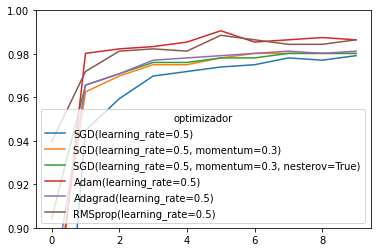

In [28]:
#Vamos a graficar este dataframe
#Recordemos que mientras más pequeño sea el "accuracy" en cada iteración significa que los aciertos se están maximizando
#En el eje X colocará los índices de cada iteración
#En el eje Y el valor de su "accuracy"
#Como son cuatro lr, creará cuatro gráficos
dfAccuracy.plot(ylim=(0.9,1))

In [ ]:
#INTERPRETACIÓN
#El "Adam(lr=0.5)" es quien nos aumenta el accuracy